In [1]:
import sys
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
kit_blue_1 = "#4664AA"
kit_blue_2 = "#7D92C3"

run = "writtenwork_depth"
res_glob = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
res_wikidata_glob = pd.read_csv("out/_results_wikidata.csv", index_col=0)
res_athlete_glob = pd.read_csv("out/_results_athlete.csv", index_col=0)
res_random_glob = pd.read_csv("out/_results_random_run.csv", index_col=0)

res_disp = res_glob.copy()
# Format integer
res_disp["n_t"] = res_disp["n_t"].map("{:,.0f}".format)
res_disp["n_b"] = res_disp["n_b"].map("{:,.0f}".format)
res_disp["m_g"] = res_disp["m_g"].map("{:,.0f}".format)
res_disp["ndisc_t"] = res_disp["ndisc_t"].map("{:,.0f}".format)
res_disp["ndisc_b"] = res_disp["ndisc_b"].map("{:,.0f}".format)
res_disp["m_t"] = res_disp["m_t"].map("{:,.0f}".format)
res_disp["m_b"] = res_disp["m_b"].map("{:,.0f}".format)
res_disp["k_0_t"] = res_disp["k_0_t"].map("{:,.0f}".format)
res_disp["k_0_b"] = res_disp["k_0_b"].map("{:,.0f}".format)
res_disp["k_med_t"] = res_disp["k_med_t"].map("{:,.0f}".format)
res_disp["c_med_t"] = res_disp["c_med_t"].map("{:,.0f}".format)
res_disp["w_med_t"] = res_disp["w_med_t"].map("{:,.0f}".format)
res_disp["k_med_b"] = res_disp["k_med_b"].map("{:,.0f}".format)
res_disp["c_med_b"] = res_disp["c_med_b"].map("{:,.0f}".format)
res_disp["w_med_b"] = res_disp["w_med_b"].map("{:,.0f}".format)

# Format float with two decimals as standard
# pd.options.display.float_format = '{:,.2f}'.format # https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns

# Format float with four decimals
res_disp["mean_dens_t"] = res_disp["mean_dens_t"].map("{:,.4f}".format)
res_disp["rc_dens_t"] = res_disp["rc_dens_t"].map("{:,.4f}".format)
res_disp["rc_ncomp_t"] = res_disp["rc_ncomp_t"].map("{:,.4f}".format)
res_disp["rc_slcc_t"] = res_disp["rc_slcc_t"].map("{:,.4f}".format)
res_disp["mean_dens_b"] = res_disp["mean_dens_b"].map("{:,.4f}".format)
res_disp["rc_dens_b"] = res_disp["rc_dens_b"].map("{:,.4f}".format)
res_disp["rc_ncomp_b"] = res_disp["rc_ncomp_b"].map("{:,.4f}".format)
res_disp["rc_slcc_b"] = res_disp["rc_slcc_b"].map("{:,.4f}".format)

# Control which classes to analyze. Add or remove rows in res_glob DataFrame
# res_glob = pd.concat([res_glob, res_athlete_glob, res_wikidata_glob, res_random_glob])
# res_glob = res_glob.loc[[
#                         "WrittenWork", #"WrittenWorkRandom",
#                         "AcademicJournal", #"AcademicJournalRandom", "ScientificJournalWikidata",
#                         "Comic", #"ComicRandom", "ComicWikidata",
#                         "Manga", #"MangaRandom",
#                         # "ComicStrip", "ComicStripRandom",
#                         # "PeriodicalLiterature", "PeriodicalLiteratureRandom",
#                         # "Newspaper", "NewspaperRandom",
#                         # "Poem", "PoemRandom",
#                         # "Boxer", "BoxerWikidata",
#                         # "Cyclist", "CyclistWikidata",
#                         ]]

print(res_glob.index.tolist())

['WrittenWork', 'Book', 'Novel', 'Comic', 'ComicStrip', 'Manga', 'Drama', 'Letter', 'PeriodicalLiterature', 'AcademicJournal', 'Magazine', 'Newspaper', 'Play', 'Poem']


,n_t,n_b,k_t_g,k_b_g
WrittenWork,90862.0,6235.0,15.743501,229.428388
Book,54578.0,4816.0,15.274854,173.104444
Novel,37.0,64.0,4.081081,2.359375
Comic,6688.0,996.0,18.461124,123.963855
ComicStrip,561.0,428.0,6.985740,9.156542
Manga,3783.0,459.0,21.421623,176.553377
Drama,2530.0,813.0,26.768775,83.302583
Letter,465.0,534.0,8.393548,7.308989
PeriodicalLiterature,22235.0,1743.0,16.565145,211.317269
AcademicJournal,7688.0,561.0,22.739334,311.622103


,n_t,n_b,k_t_g,k_b_g
AnatomicalStructure,7373.0,2458.0,9.936661,29.805940
Artery,449.0,134.0,15.928731,53.373134
Bone,604.0,257.0,9.971854,23.435798
Brain,632.0,166.0,12.928797,49.222892
Lymph,82.0,86.0,11.621951,11.081395
Muscle,315.0,98.0,16.625397,53.438776
Nerve,394.0,131.0,13.149746,39.549618
Vein,257.0,45.0,14.992218,85.622222


,n_t,n_b,k_t_g,k_b_g
Athlete,404915.0,10030.0,23.804312,960.989332
Boxer,6457.0,535.0,19.388571,234.003738
AmateurBoxer,445.0,80.0,18.067416,100.500000
GridironFootballPlayer,26560.0,1582.0,30.873870,518.337547
AmericanFootballPlayer,21579.0,1467.0,32.475879,477.707566
MotorsportRacer,7838.0,1204.0,21.165476,137.786545
RacingDriver,5454.0,894.0,21.190869,129.278523
FormulaOneRacer,902.0,281.0,26.060976,83.654804
NascarDriver,986.0,374.0,26.985801,71.144385
WinterSportPlayer,27278.0,3425.0,25.829203,205.713577


,n_t,n_b,k_t_g,k_b_g
Politician,148459.0,7118.0,20.577143,429.174206
Ambassador,7570.0,1037.0,19.800661,144.542912
Chancellor,80.0,141.0,28.537500,16.191489
Congressman,3466.0,380.0,34.796884,317.384211
Governor,2711.0,567.0,31.011435,148.275132
Lieutenant,1665.0,647.0,18.688889,48.094281
Mayor,13705.0,1797.0,21.007151,160.213133
MemberOfParliament,7087.0,487.0,27.271765,396.868583
President,13907.0,4329.0,22.855037,73.422268
PrimeMinister,1458.0,368.0,30.292181,120.016304


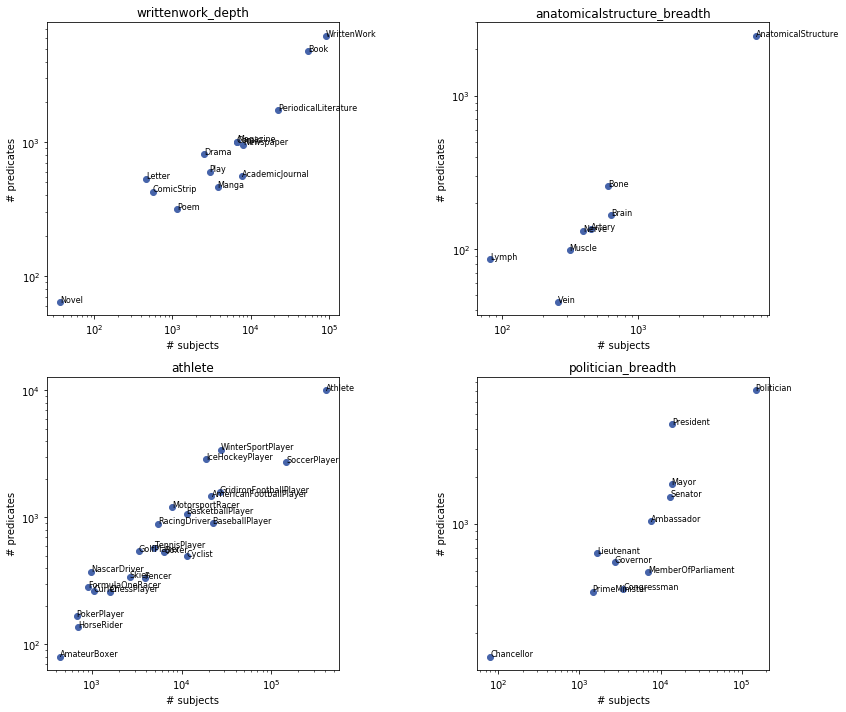

In [3]:
# Number of subjects and predicates per class

res = res_glob

runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*5))
for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    display(res[["n_t", "n_b", "k_t_g", "k_b_g"]])
    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
    axes[row, col].set_title(run)
    axes[row, col].set_xlabel("# subjects")
    axes[row, col].set_ylabel("# predicates")
    
    axes[row, col].scatter(res["n_t"], res["n_b"], color=kit_blue_1, marker="o")
    for i, label in enumerate(res.index):
        axes[row, col].annotate(label, (res["n_t"][i], res["n_b"][i]), fontsize=8)
    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")
    axes[row, col].set_xlabel("# subjects")
    axes[row, col].set_ylabel("# predicates")

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

,n_t,n_b,dens_t,dens_b,k_0_t,k_0_b,rc_dens_t,rc_dens_b,rel_rc_t,rel_rc_b,superclass
WrittenWork,"90,862","6,235",0.699602,0.014910,145,"43,973",0.0005,0.0000,NaN,NaN,Work
Book,"54,578","4,816",0.664870,0.018122,109,"34,408",0.0011,0.0000,1.973920,1.552649,WrittenWork
Novel,37,64,0.610084,0.174107,9,28,0.0199,0.0064,36.229853,783.344965,Book
Comic,"6,688",996,0.896688,0.062425,48,"5,147",0.0065,0.0004,11.836126,50.951361,WrittenWork
ComicStrip,561,428,0.436281,0.088708,33,187,0.0029,0.0004,5.258883,53.502945,Comic
Manga,"3,783",459,0.981730,0.145770,48,"3,298",0.0269,0.0026,49.083107,313.831196,Comic
Drama,"2,530",813,0.896115,0.110798,57,"1,657",0.0114,0.0012,20.717117,151.202294,WrittenWork
Letter,465,534,0.811383,0.240129,145,415,0.0039,0.0011,7.194502,136.534040,WrittenWork
PeriodicalLiterature,"22,235","1,743",0.863552,0.030943,40,"14,725",0.0030,0.0001,5.419669,13.749793,WrittenWork
AcademicJournal,"7,688",561,0.960894,0.084775,40,"6,451",0.0260,0.0018,47.413053,225.645640,PeriodicalLiterature


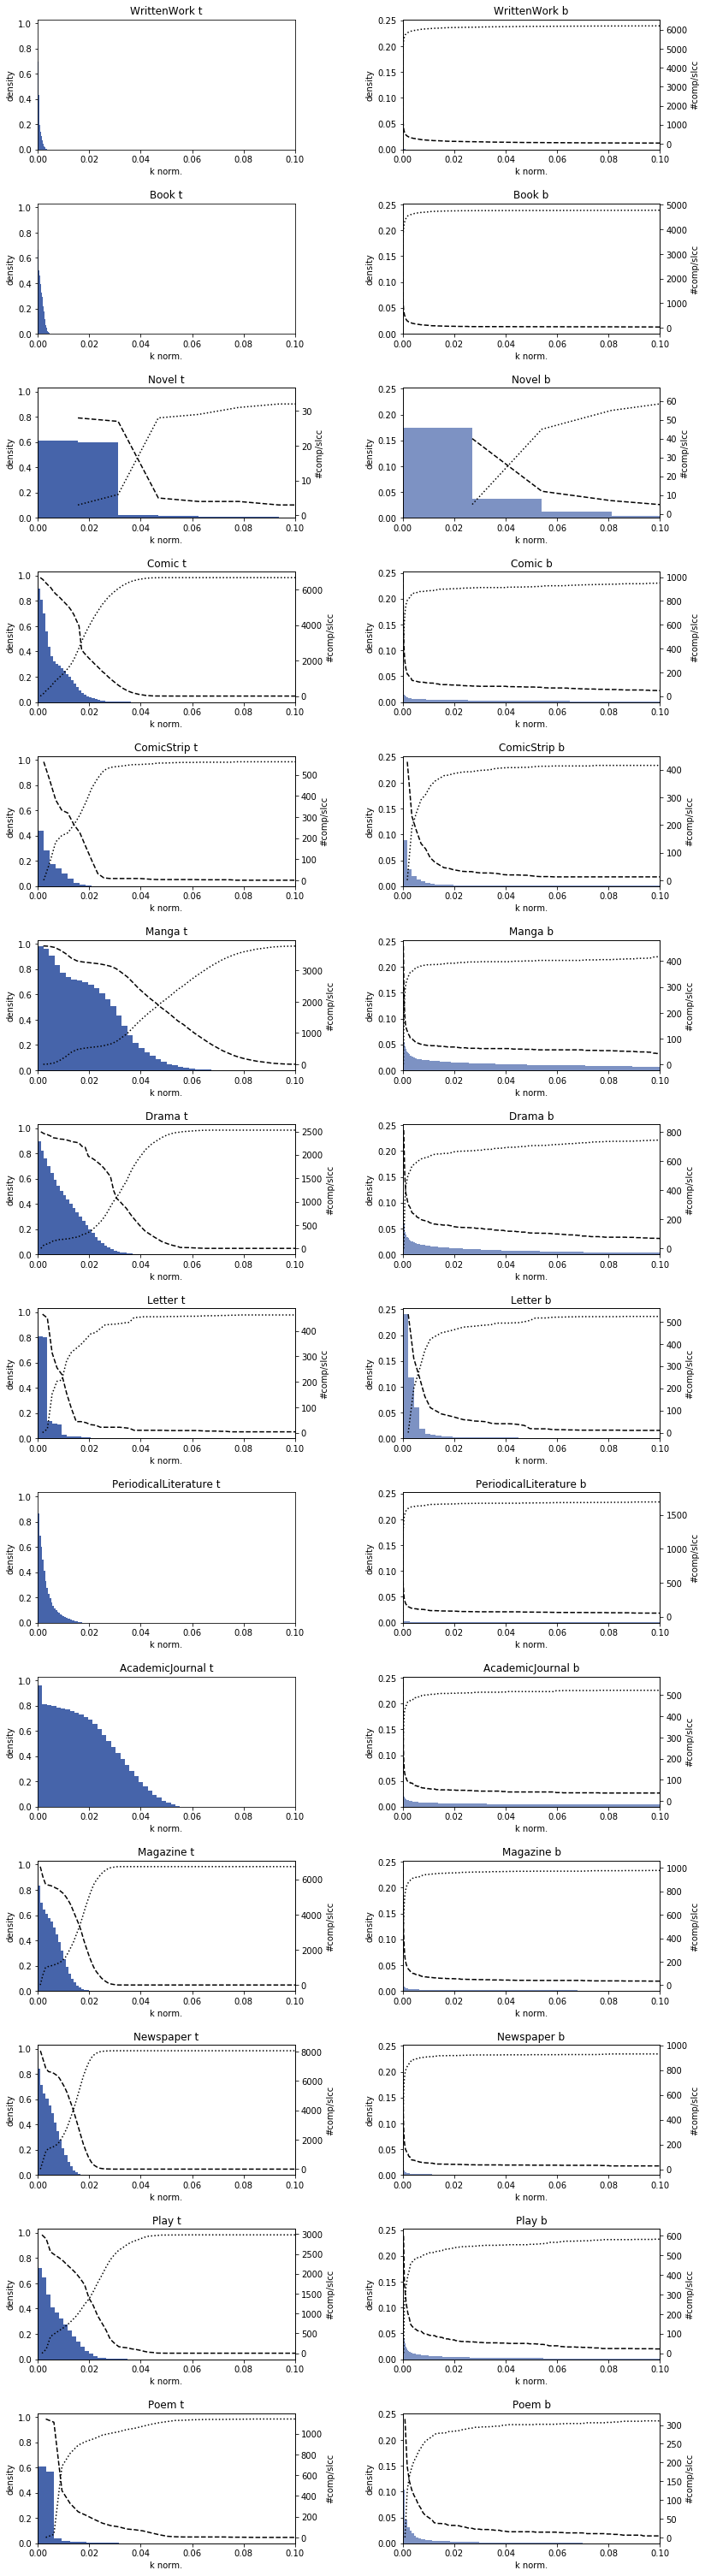

In [4]:
# KNC plots for each superclass and its subclasses

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)

display(res_disp[["n_t", "n_b", "dens_t", "dens_b", "k_0_t", "k_0_b", "rc_dens_t", "rc_dens_b", "rel_rc_t", "rel_rc_b", "superclass"]])

fig, axes = plt.subplots(len(classes), 2, sharex="none", sharey="col", figsize=(12, 3 * len(classes)))

# k_0_t_norm = (res["k_0_t"] / res["n_b"]).max() # Dynamic xmax (Can be very high with small density)
# print("k_0_t_norm", k_0_t_norm)

for classname in classes:
    row = classes.index(classname)
    try:
        df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv")
        df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv")
    except FileNotFoundError as e:
        print(classname, e)
    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    # Top
    k = []
    dens = []
    ncomp = []
    slcc = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_t.columns:
        has_ncomp = True
    if "slcc" in df_t.columns:
        has_slcc = True

    for i, knc_row in df_t.iterrows():
        k.append(knc_row["k"] / n_b)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append(knc_row["slcc"])

    axes[row, 0].set_title(classname + " t")
    axes[row, 0].set_xlabel("k norm.")
    axes[row, 0].set_ylabel("density")
#     axes[row, 0].plot(k, dens)
    axes[row, 0].bar(k, dens, width=(-1/n_b), align="edge", color=kit_blue_1)
    axes[row, 0].set_xlim(0, 0.1)
    if has_ncomp and has_slcc:
        ax2 = axes[row, 0].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
        ax2.plot(k, ncomp, color="black", linestyle="dotted")
        ax2.plot(k, slcc, color="black", linestyle="dashed")
        ax2.set_ylabel("#comp/slcc")

    # Bot
    k = []
    dens = []
    ncomp = []
    slcc = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_b.columns:
        has_ncomp = True
    if "slcc" in df_b.columns:
        has_slcc = True

    for i, knc_row in df_b.iterrows():
        k.append(knc_row["k"] / n_t)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append(knc_row["slcc"])

    axes[row, 1].set_title(classname + " b")
    axes[row, 1].set_xlabel("k norm.")
    axes[row, 1].set_ylabel("density")
#     axes[row, 1].plot(k, dens)
    axes[row, 1].bar(k, dens, width=-(1/n_t), align="edge", color=kit_blue_2)
    axes[row, 1].set_xlim(0, 0.1)
    if has_ncomp and has_slcc:
        ax2 = axes[row, 1].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
        ax2.plot(k, ncomp, color="black", linestyle="dotted")
        ax2.plot(k, slcc, color="black", linestyle="dashed")
        ax2.set_ylabel("#comp/slcc")

plt.subplots_adjust(wspace=50, hspace=10)
plt.tight_layout()

Compare relative values e.g. (k_mean_t / n_t) ?


,n_t,n_b,ndisc_t,ndisc_b,k_t_g,k_b_g,k_mean_t,k_sd_t,k_mean_b,k_sd_b,k_med_t,k_med_b,superclass
WrittenWork,"90,862","6,235",4,0,15.743501,229.428388,63569.341786,22721.509958,92.951083,197.639222,"73,262",40,Work
Book,"54,578","4,816",4,1,15.274854,173.104444,36289.269872,14510.249679,87.237383,167.855497,"42,908",43,WrittenWork
Novel,37,64,4,17,4.081081,2.359375,12.909091,8.663275,7.531915,8.063184,18,5,Book
Comic,"6,688",996,0,0,18.461124,123.963855,5996.151017,1176.291385,48.993976,75.441432,"6,347",29,WrittenWork
ComicStrip,561,428,0,1,6.985740,9.156542,223.704100,112.300390,35.475410,33.986100,219,28,Comic
Manga,"3,783",459,0,0,21.421623,176.553377,3712.903516,265.213688,64.575163,73.021472,"3,753",40,Comic
Drama,"2,530",813,0,1,26.768775,83.302583,2266.274308,437.877714,89.857143,100.039348,"2,396",54,WrittenWork
Letter,465,534,0,0,8.393548,7.308989,309.913978,138.238601,113.734082,105.495729,373,48,WrittenWork
PeriodicalLiterature,"22,235","1,743",3,1,16.565145,211.317269,19202.811443,4292.014176,53.871412,108.679637,"20,773",25,WrittenWork
AcademicJournal,"7,688",561,1,1,22.739334,311.622103,7387.351112,923.495416,47.389286,60.729540,"7,558",27,PeriodicalLiterature


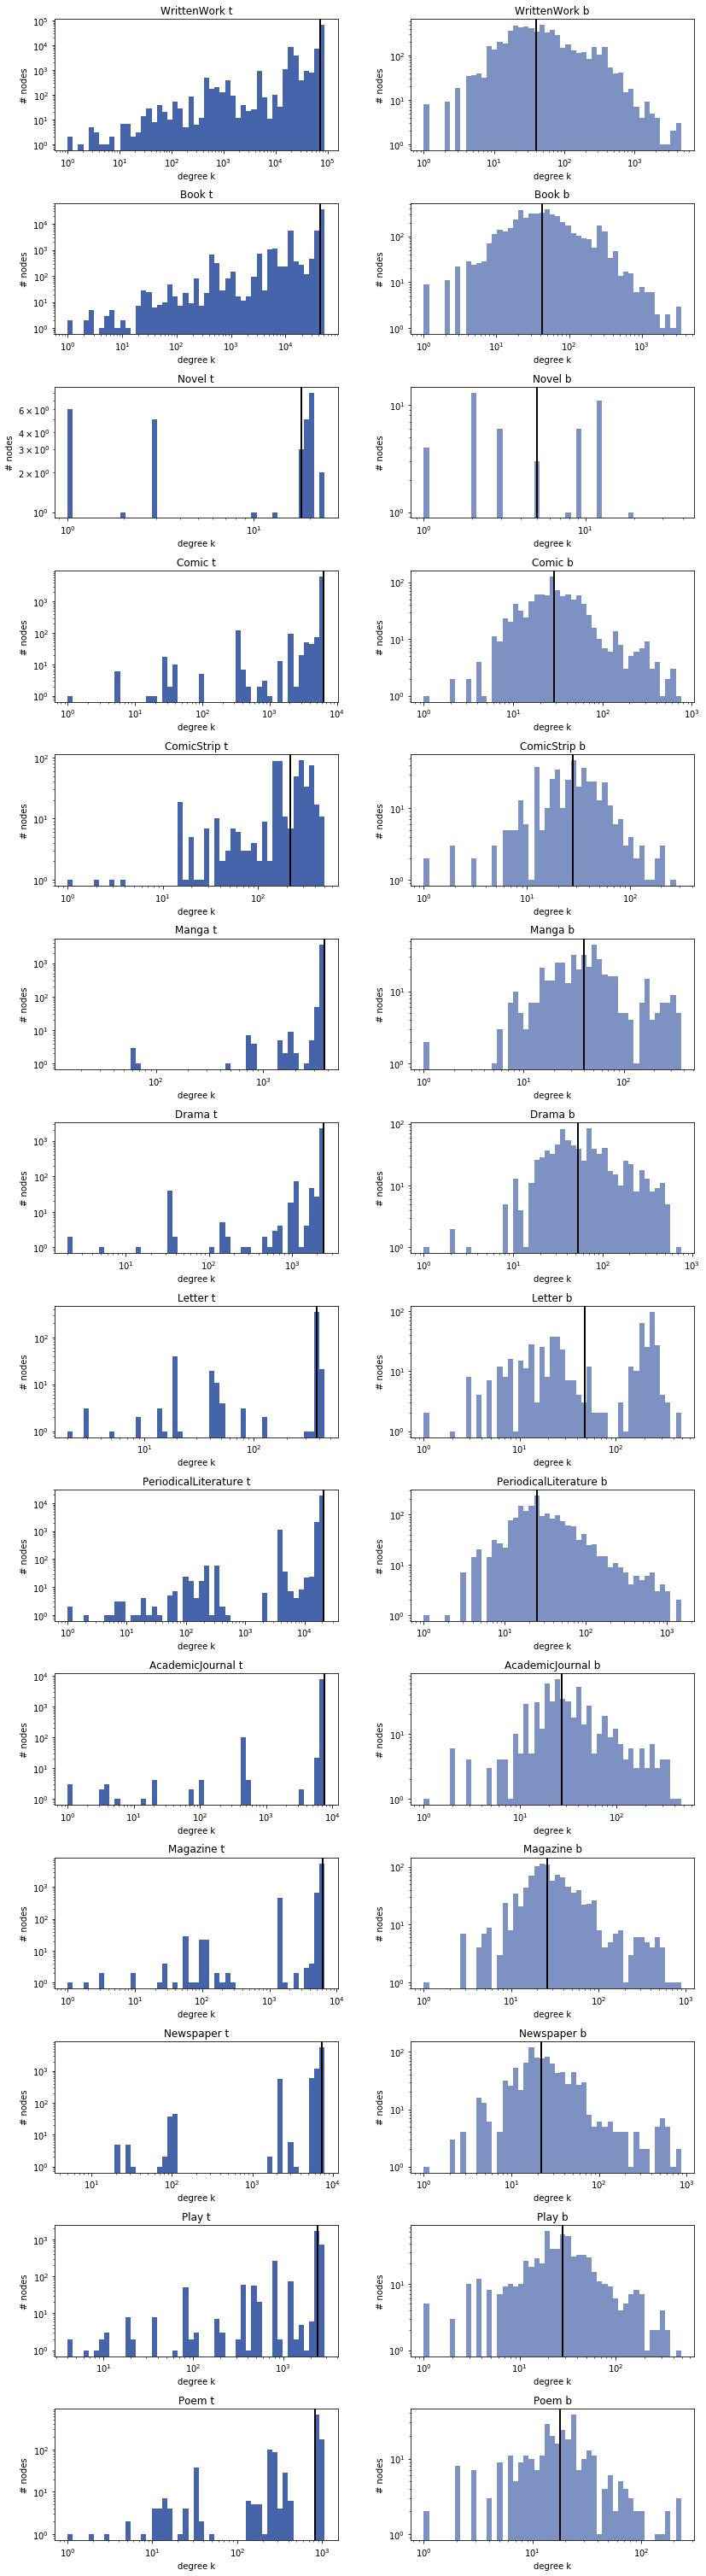

In [5]:
# Degree histogram of top and bot onemode graphs (log log scale)
# Wikidata degrees are most times 100% @ one k

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_t = res.loc[classname, "n_t"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " t")
    axes[row, 0].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 0].set_xlabel("degree k")
    axes[row, 0].set_ylabel("# nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(k, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_b = res.loc[classname, "n_b"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " b")
    axes[row, 1].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 1].set_xlabel("degree k")
    axes[row, 1].set_ylabel("# nodes")
    hist, bins, _ = axes[row, 1].hist(k, bins=logbins, color=kit_blue_2)

print("Compare relative values e.g. (k_mean_t / n_t) ?")
display(res_disp[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]])

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

In [6]:
# Get subjects and predicates whose nodedegree is in given range

def get_nodes_k_range(classname, onemode, start, end):
    with open(f"out/{classname}/{classname}.{onemode}.nk.json", "r") as in_file:
        nodedegrees = json.load(in_file)
    myresults = []
    for entity, degree in nodedegrees.items():
        if degree in range(start, end):
            myresults.append((entity, degree))
    myresults.sort(key=lambda x: x[1])
    print(f"{classname} {onemode}")
    for entity, degree in myresults[:20]:
        print(degree, entity)

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = ["Poem"]
for classname in classes:
    get_nodes_k_range(classname, "t", 0, 20)
    get_nodes_k_range(classname, "b", 0, 10)
    print("\n")
    
# myresult = {key: mydict[key] for key in sorted(mydict, key=mydict.get, reverse=True)[:9]} # Get n highest/lowest pairs

Poem t
1 http://dbpedia.org/resource/Jewang_Ungi
2 http://dbpedia.org/resource/Hallaig
3 http://dbpedia.org/resource/The_Eagle_(poem)
5 http://dbpedia.org/resource/Bodhi_Vamsa
5 http://dbpedia.org/resource/Guillaume_de_Palerme
8 http://dbpedia.org/resource/Stream_of_Life
10 http://dbpedia.org/resource/Bhaṭṭikāvya
10 http://dbpedia.org/resource/Savitri:_A_Legend_and_a_Symbol
10 http://dbpedia.org/resource/In_my_Craft_or_Sullen_Art
10 http://dbpedia.org/resource/La_Venoge_(poem)
13 http://dbpedia.org/resource/Shan_Xing
13 http://dbpedia.org/resource/The_Flea_(poem)
13 http://dbpedia.org/resource/The_Dream_(Lord_Byron_poem)
13 http://dbpedia.org/resource/Cleanness
14 http://dbpedia.org/resource/Visits_to_St._Elizabeths
14 http://dbpedia.org/resource/Presents_from_my_Aunts_in_Pakistan
14 http://dbpedia.org/resource/Maoz_Tzur
14 http://dbpedia.org/resource/Anim_Zemirot
14 http://dbpedia.org/resource/Five_Ranks
14 http://dbpedia.org/resource/Lai
Poem b
1 http://dbpedia.org/property/volume
1 

,m_t,m_b,w_med_t,w_med_b,superclass
WrittenWork,"2,887,891,628","289,775",3,1,Work
Book,"990,225,307","210,024",7,1,WrittenWork
Novel,213,177,2,1,Book
Comic,"20,051,129","24,399",4,1,WrittenWork
ComicStrip,"62,749","7,574",2,1,Comic
Manga,"7,022,957","14,820",14,2,Comic
Drama,"2,866,837","36,482",9,2,WrittenWork
Letter,"72,055","30,367",2,1,WrittenWork
PeriodicalLiterature,"213,458,452","46,922",4,1,WrittenWork
AcademicJournal,"28,393,284","13,269",16,1,PeriodicalLiterature


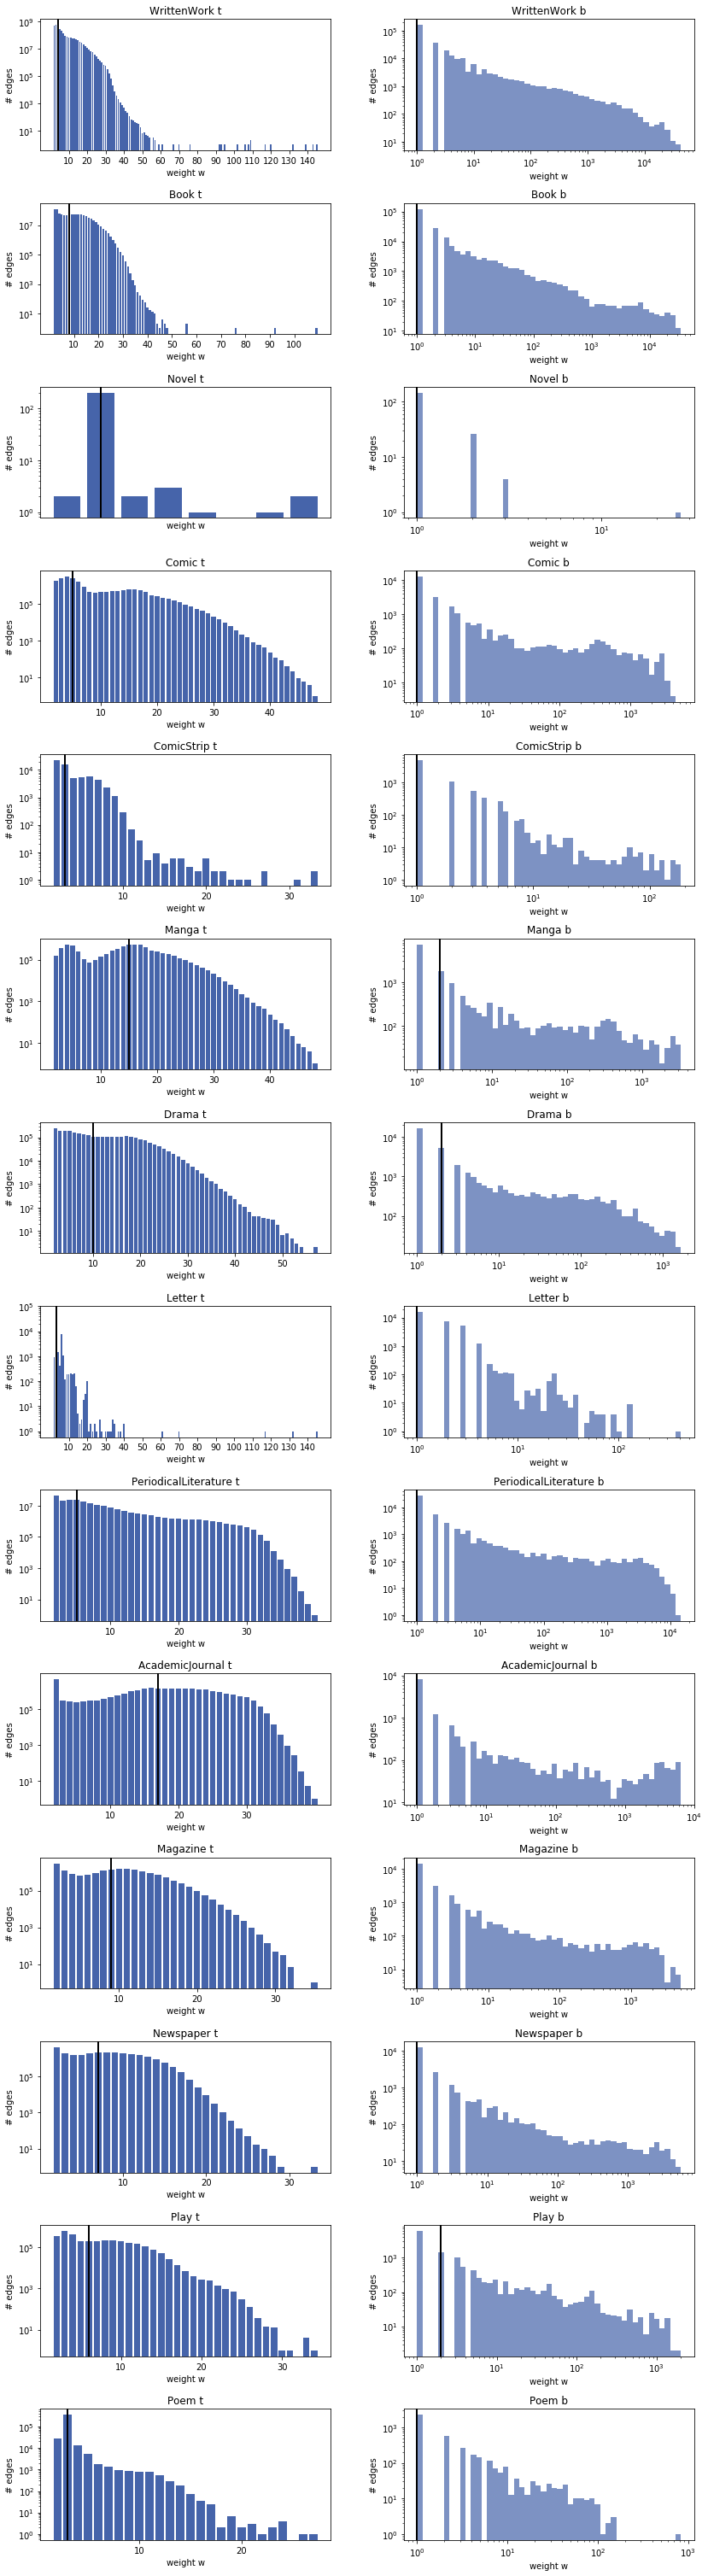

In [17]:
# Weight hist top and bot
# Difficulty: m_t very large, manual for t
# How to limit x axis?

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)

# pd.options.display.float_format = '{:,.0f}'.format
display(res_disp[["m_t", "m_b", "w_med_t", "w_med_b", "superclass"]]) # TODO: sdev

fig, axes = plt.subplots(nrows=len(classes), ncols=2, sharex="none", sharey="none", figsize=(12, 3 * len(classes)))
for classname in classes:
    row = classes.index(classname)
    # Top (density dist)
    w = []
    pw = []
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    median = res.loc[classname, "w_med_t"]
    for weight, count in dist.items():
        if int(weight) > 0:
            w.append(int(weight))
            pw.append(count)
    axes[row, 0].bar(w, pw, align='center', color=kit_blue_1)
    axes[row, 0].axvline(median, color='k', linewidth=2)
    axes[row, 0].set_title(classname + " t")
    axes[row, 0].set_yscale("log")
    axes[row, 0].tick_params(axis="x", reset=True, top=False)
    axes[row, 0].set_xticks(range(9, max(w), 10))
    axes[row, 0].set_xticklabels(range(10, max(w), 10))
    axes[row, 0].set_xlabel("weight w")
    axes[row, 0].set_ylabel("# edges")
    # Bot (hist)
    w = []
    with open(f"out/{classname}/{classname}.b.w.json", "r") as input_file:
        dist = json.load(input_file)
    for weight, count in dist.items():
        if int(weight) > 0:
            w.extend([int(weight)] * count)
    
    logbins = np.geomspace(min(w), max(w), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " b")
    axes[row, 1].set_xlabel("weight w")
    axes[row, 1].set_ylabel("# edges")
    axes[row, 1].axvline(np.median(w), color='k', linewidth=2)
    hist, bins, _ = axes[row, 1].hist(w, bins=logbins, color=kit_blue_2)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

In [8]:
# TODO: Get list of subject pairs with high w and low w
# TODO: Get list of predicate pairs with high w and low w
# How to implement this for huge .t.csv edgelist files?

,n_t,n_b,k_t_g,k_b_g,c_mean_t,c_sd_t,c_mean_b,c_sd_b,c_med_t,c_med_b,superclass
WrittenWork,"90,862.00","6,235.00",15.74,229.43,"310,860.44","205,948.56","4,633.74","40,442.02","305,451.50",63.00,Work
Book,"54,578.00","4,816.00",15.27,173.10,"284,701.62","191,426.76","3,337.18","33,820.39","332,892.00",65.00,WrittenWork
Novel,37.00,64.00,4.08,2.36,27.39,17.30,10.09,15.11,38.00,5.00,Book
Comic,"6,688.00",996.00,18.46,123.96,"43,254.63","21,863.40","2,503.84","11,104.10","42,269.00",46.50,WrittenWork
ComicStrip,561.00,428.00,6.99,9.16,625.92,483.63,100.48,228.15,401.00,36.00,Comic
Manga,"3,783.00",459.00,21.42,176.55,"46,751.83","17,363.77","4,444.51","14,158.64","51,004.00",53.00,Comic
Drama,"2,530.00",813.00,26.77,83.30,"23,372.28","11,139.15","2,537.95","7,699.72","25,368.00",91.50,WrittenWork
Letter,465.00,534.00,8.39,7.31,795.51,414.70,242.56,298.89,758.00,166.00,WrittenWork
PeriodicalLiterature,"22,235.00","1,743.00",16.57,211.32,"115,260.02","62,810.31","4,354.26","24,590.84","117,078.00",27.00,WrittenWork
AcademicJournal,"7,688.00",561.00,22.74,311.62,"112,203.53","44,751.07","7,932.95","30,371.82","127,212.00",29.50,PeriodicalLiterature


Compare relative values e.g. (k_mean_t / n_t) ?


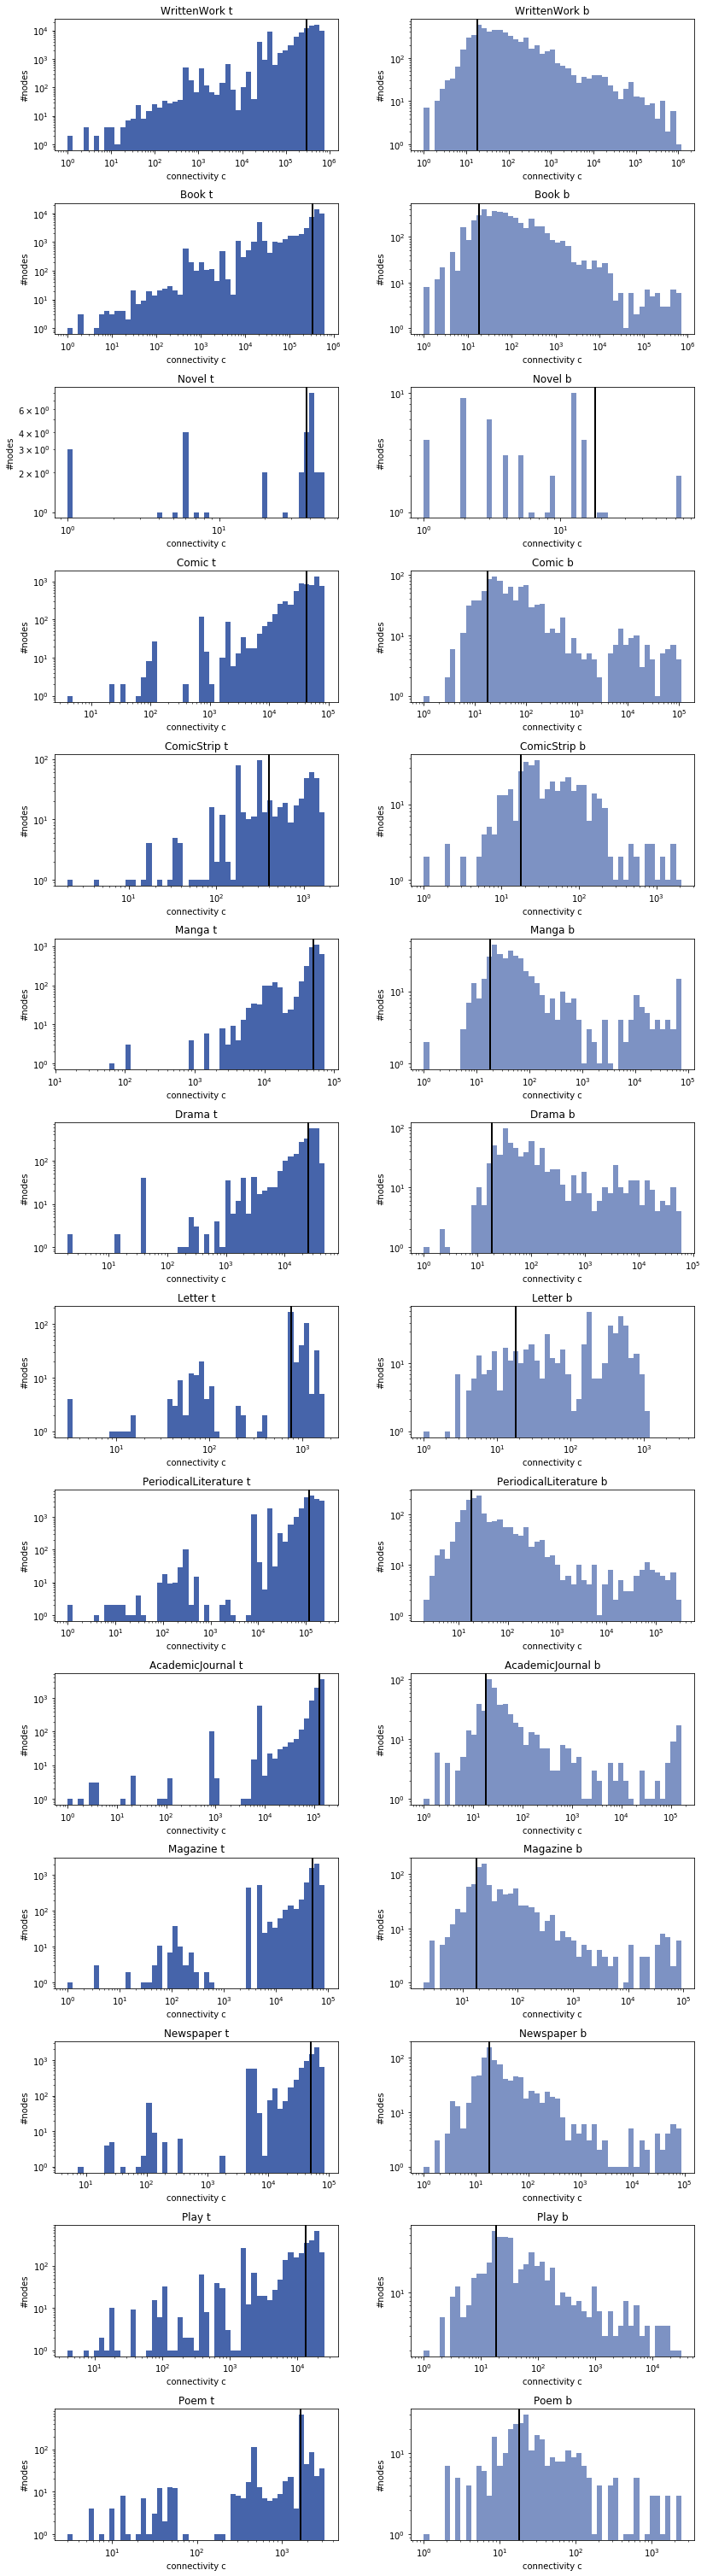

In [9]:
# Connectivity histogram of top and bot onemode graphs

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)

pd.options.display.float_format = '{:,.2f}'.format
display(res[["n_t", "n_b", "k_t_g", "k_b_g", "c_mean_t", "c_sd_t", "c_mean_b", "c_sd_b", "c_med_t", "c_med_b", "superclass"]])
print("Compare relative values e.g. (k_mean_t / n_t) ?")

nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity)] * count)

    logbins = np.geomspace(min(c), max(c), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " t")
    axes[row, 0].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 0].set_xlabel("connectivity c")
    axes[row, 0].set_ylabel("#nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(c, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity) for i in range(0, count)])

    logbins = np.geomspace(min(c), max(c), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " b")
    axes[row, 1].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 1].set_xlabel("connectivity c")
    axes[row, 1].set_ylabel("#nodes")
    hist, bins, _ = axes[row, 1].hist(c, bins=logbins, color=kit_blue_2)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

In [10]:
# Get subjects and predicates whose connectivity is in given range

def get_nodes_c_range(classname, onemode, start, end):
    with open(f"out/{classname}/{classname}.{onemode}.nc.json", "r") as in_file:
        nodeconnectivities = json.load(in_file)
    myresults = []
    for entity, connectivity in nodeconnectivities.items():
        if connectivity in range(start, end):
            myresults.append((entity, connectivity))
    myresults.sort(key=lambda x: x[1])
    print(f"{classname} {onemode}")
    for entity, connectivity in myresults[:20]:
        print(connectivity, entity)

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = ["Poem"]
for classname in classes:
    get_nodes_c_range(classname, "t", 0, 20)
    get_nodes_c_range(classname, "b", 0, 10)
    print("\n")
    
# myresult = {key: mydict[key] for key in sorted(mydict, key=mydict.get, reverse=True)[:9]} # Get n highest/lowest pairs

Poem t
3 http://dbpedia.org/resource/Jewang_Ungi
6 http://dbpedia.org/resource/Bodhi_Vamsa
6 http://dbpedia.org/resource/Guillaume_de_Palerme
6 http://dbpedia.org/resource/Hallaig
6 http://dbpedia.org/resource/The_Eagle_(poem)
8 http://dbpedia.org/resource/Stream_of_Life
10 http://dbpedia.org/resource/Bhaṭṭikāvya
10 http://dbpedia.org/resource/Savitri:_A_Legend_and_a_Symbol
10 http://dbpedia.org/resource/In_my_Craft_or_Sullen_Art
10 http://dbpedia.org/resource/La_Venoge_(poem)
13 http://dbpedia.org/resource/Cleanness
13 http://dbpedia.org/resource/The_Flea_(poem)
13 http://dbpedia.org/resource/The_Dream_(Lord_Byron_poem)
14 http://dbpedia.org/resource/Presents_from_my_Aunts_in_Pakistan
14 http://dbpedia.org/resource/Maoz_Tzur
14 http://dbpedia.org/resource/Anim_Zemirot
14 http://dbpedia.org/resource/Lai
14 http://dbpedia.org/resource/Visits_to_St._Elizabeths
16 http://dbpedia.org/resource/Shan_Xing
Poem b
1 http://dbpedia.org/property/project
2 http://dbpedia.org/property/partOf
2 http

n_t_super 90862.0
n_b_super 6235.0
n_b_th WrittenWork 6.0
n_b_th Book 7.0
n_b_th Novel 12.0
n_b_th Comic 11.0
n_b_th ComicStrip 12.0
n_b_th Manga 12.0
n_b_th Drama 11.0
n_b_th Letter 11.0
n_b_th PeriodicalLiterature 10.0
n_b_th AcademicJournal 11.0
n_b_th Magazine 11.0
n_b_th Newspaper 11.0
n_b_th Play 11.0
n_b_th Poem 12.0


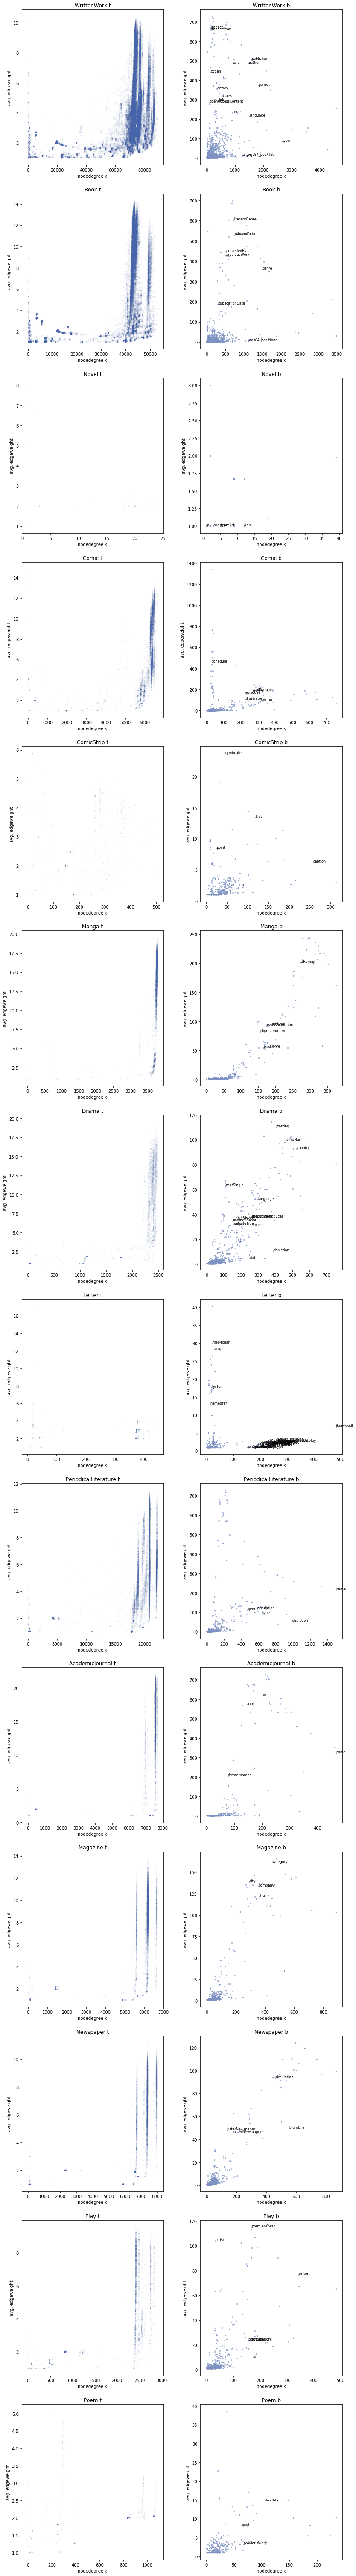

In [11]:
# Average edge weight (connectivity based) over degree per entity scatterplot

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)

nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*6))
n_t_super = res["n_t"].iloc[0]
n_b_super = res["n_b"].iloc[0]
print("n_t_super", n_t_super)
print("n_b_super", n_b_super)
for classname in classes:
    row = classes.index(classname)
    # Top
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.t.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.t.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1][:9])
        k.append(value)
        c.append(nc_dist.get(key) / value)

    axes[row, 0].set_title(classname + " t")
    axes[row, 0].set_xlabel("nodedegree k")
    axes[row, 0].set_ylabel("avg. edgeweight")
    axes[row, 0].scatter(k, c, s=5, color=kit_blue_1+"0a")
    # n_t = res.loc[classname, "n_t"]
    # n_t_th = round(np.interp(n_t, [0, n_t_super], [100, 600]))
    # print(f"n_t_th {classname} {n_t_th}")
    # for i, label in enumerate(n): # Only annotate some entities
    #     if (round(c[i]) % 2 == 0 and i % n_t_th == 0):
    #         axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)
    # Bot
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.b.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.b.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1])
        k.append(value)
        c.append(nc_dist.get(key) / value)
    
    axes[row, 1].set_title(classname + " b")
    axes[row, 1].set_xlabel("nodedegree k")
    axes[row, 1].set_ylabel("avg. edgeweight")
    axes[row, 1].scatter(k, c, s=5, color=kit_blue_2+"aa")
    n_b = res.loc[classname, "n_b"]
    n_b_th = round(np.interp(n_b, [0, n_b_super], [12, 6]))
    print(f"n_b_th {classname} {n_b_th}")
    for i, label in enumerate(n): # Annotate only some entities
        if ((k[i] > (axes[row, 1].get_xlim()[1] * 0.25) and i % n_b_th == 0)
            or (c[i] > (axes[row, 1].get_ylim()[1] * 0.25) and i % n_b_th == 0)):
            axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)

# TODO: Query subject and predicate examples from nk and nc (c == k * avg. edgeweight)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

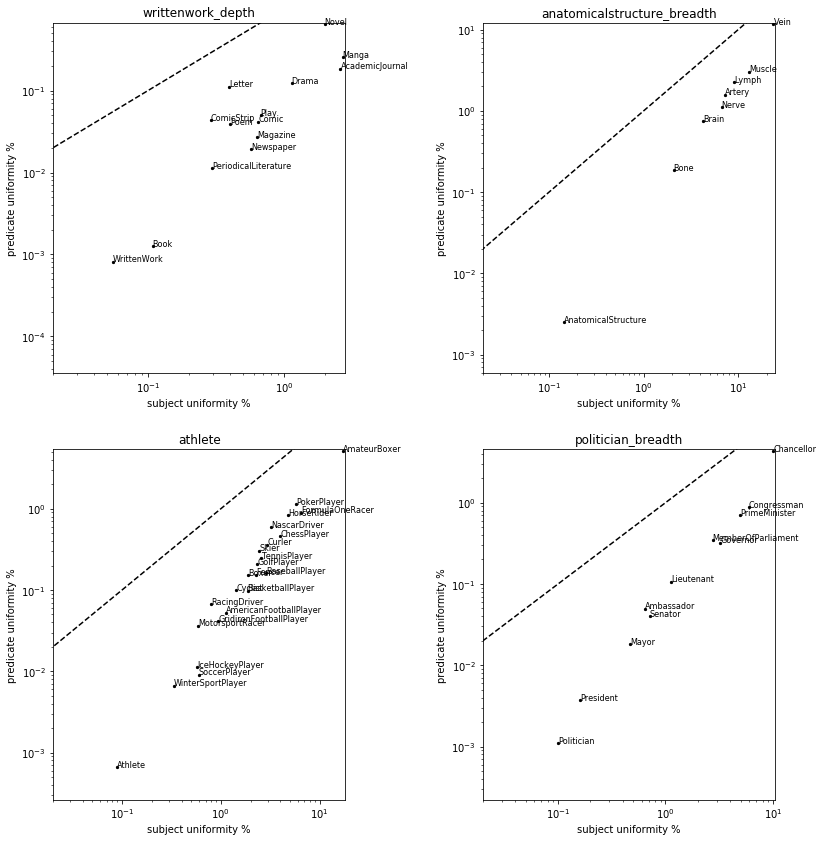

In [12]:
# rc_t over rc_b (in %) for each class and each run scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*6))
for run in runs:
    label = []
    sclass = []
    subj = []
    pred = []
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        label.append(classname)
        sclass.append(res.loc[classname, "superclass"])
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)

    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
    axes[row, col].set_title(run)
    axes[row, col].set_xlabel("subject uniformity %")
    axes[row, col].set_ylabel("predicate uniformity %")
    axes[row, col].scatter(subj, pred, marker="o", s=5, color="black")
    for i, label in enumerate(label):
        axes[row, col].annotate(label, (subj[i], pred[i]), fontsize=8)

    xmin, xmax = axes[row, col].get_xlim()
    ymin, ymax = axes[row, col].get_ylim()
    axes[row, col].set_xlim(0.02, xmax)
    axes[row, col].set_ylim(ymin - (ymin * 1.001), ymax)

    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")

    axes[row, col].autoscale(False)

    origin_x = np.linspace(0.001,100,3)
    origin_y = origin_x
    axes[row, col].plot(origin_x, origin_y, color="black", linestyle="dashed")

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

n_t 5, n_b 4, m 10


/home/david/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


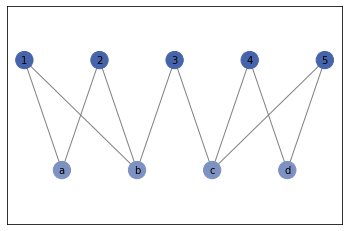

In [13]:
# Example bipartite graphs
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5], bipartite=0)
G.add_nodes_from(["a", "b", "c", "d"], bipartite=1)
# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])
# FiveFour graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),
#                     (2,"a"),(2,"b"),(2,"c"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"b"),(4,"c"),
#                     (5,"d")])
# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
G.add_edges_from([(1,"a"),(1,"b"),
                    (2,"a"),(2,"b"),
                    (3,"b"),(3,"c"),
                    (4,"c"),(4,"d"),
                    (5,"c"),(5,"d")])
top = [1, 2, 3, 4, 5] # top, bot = nx.bipartite.sets(G)
bot = ["a", "b", "c", "d"]
color_dict = {0: kit_blue_1, 1: kit_blue_2}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
print(f"n_t {len(top)}, n_b {len(bot)}, m {G.number_of_edges()}")

# bi_layout = nx.bipartite_layout(G, top, align="horizontal", aspect_ratio=20, scale=1)
# nx.draw_networkx(G, bi_layout, font_size=10, edge_color="grey", node_color=color_list)

bot_len = len(bot)
pos = dict()
pos.update((n, (i, 1.1)) for i, n in enumerate(top))
pos.update((n, (i + 0.5, 1)) for i, n in enumerate(bot))
nx.draw_networkx(G, pos=pos, font_size=10, edge_color="grey", node_color=color_list)

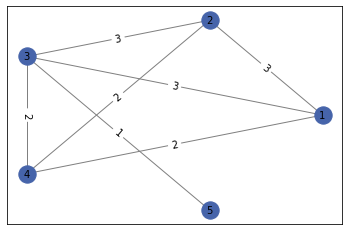

In [14]:
# Example onemode graphs
G = nx.Graph()
# Top mode
# FiveFour graph
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,3),(1,3,3),(1,4,2),
                            (2,3,3),(2,4,2),
                            (3,4,2),(3,5,1)])

nx.draw_networkx(G, pos=nx.circular_layout(G, scale=1), font_size=10, edge_color="grey", node_color=kit_blue_1)
labels = nx.get_edge_attributes(G, 'weight')
_ = nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G, scale=1), edge_labels=labels, font_size=10)

# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])

# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
# G.add_edges_from([(1,"a"),(1,"b"),
#                     (2,"a"),(2,"b"),
#                     (3,"b"),(3,"c"),
#                     (4,"c"),(4,"d"),
#                     (5,"c"),(5,"d")])

# G.add_nodes_from(["a", "b", "c", "d"])